# 선형회귀 식 찾기

In [1]:
time_upper = 14500
time_lower = 30

## Naive

$$O(NM^2)$$
```
절편 152.45287120548846
계수 [1.62163637e-06]
결정계수 0.9909917153377062

절편 0.0
계수 [1.67028111e-06]
결정계수 0.9867483167594435
```

In [3]:
# 경로 변수 저장
csv_path = "plot_3dim_naive.csv"

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
# pd.DataFrame(df.groupby(['n', 'm']).mean())
df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()
df

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       880 non-null    int64 
 1   m       880 non-null    int64 
 2   time    880 non-null    int64 
 3   name    880 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB
None
     n   m  time   name
0  100  10     0  Naive
1  100  10     0  Naive
2  100  10     0  Naive
3  100  10     0  Naive
4  100  10     0  Naive
Index(['Naive'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       880 non-null    int64  
 1   m       880 non-null    int64  
 2   time    880 non-null    float64
 3   name    880 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 27.6+ KB
None


<ipython-input-3-004a117d5c14>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()


,n,m,time
0,100,10,3.0
1,100,20,7.6
2,100,40,4.5
3,100,80,9.0
4,100,160,13.6
...,...,...,...
83,102400,80,1802.8
84,102400,160,4952.4
85,102400,320,15000.0
86,102400,640,15000.0


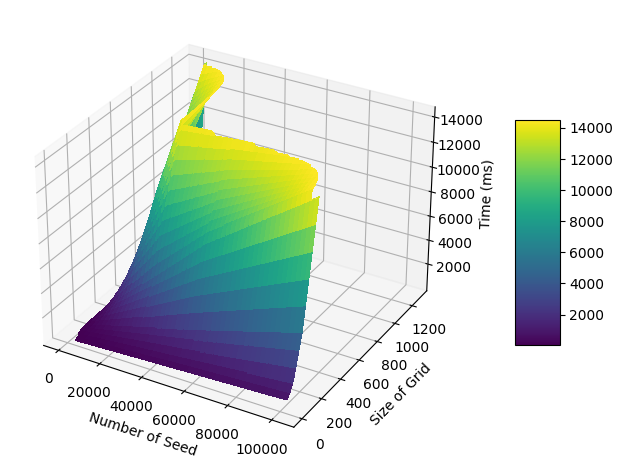

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(x_new, y_new, z_new, cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed')
ax.set_ylabel('Size of Grid')
ax.set_zlabel('Time (ms)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

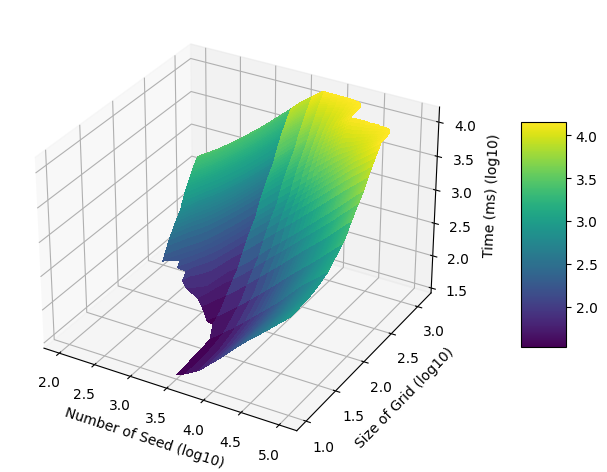

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(np.log10(x_new), np.log10(y_new), np.log10(z_new), cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed (log10)')
ax.set_ylabel('Size of Grid (log10)')
ax.set_zlabel('Time (ms) (log10)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

In [6]:
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]
dataset

,n,m,time
5,100,320,32.3
6,100,640,114.6
7,100,1280,467.2
13,200,320,52.2
14,200,640,197.5
15,200,1280,741.7
20,400,160,30.7
21,400,320,83.7
22,400,640,325.3
23,400,1280,1286.1


In [7]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
logN = np.full(len(N), 0.0)
logM = np.full(len(N), 0.0)
logT = np.full(len(N), 0.0)
for i in range(len(logN)):
  logN[i] = math.log(N[i])
for i in range(len(logM)):
  logM[i] = math.log(M[i])
for i in range(len(logT)):
  logT[i] = math.log(T[i])

X = np.append(logN.reshape(-1, 1).T.T, logM.reshape(-1, 1).T.T, axis=1)
y = logT.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 -6.920417814804074
계수 [0.83617176 1.16837183]
결정계수 0.8798918353233846


In [10]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
NM2 = np.full(len(N), 0.0)
for i in range(len(NM2)):
  NM2[i] = M[i] * M[i] * N[i]

# X = np.append(NM2.reshape(-1, 1).T.T, N.reshape(-1, 1).T.T, axis=1)
X = NM2.reshape(-1, 1).T.T
y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 152.45287120548846
계수 [1.62163637e-06]
결정계수 0.9909917153377062
절편 0.0
계수 [1.67028111e-06]
결정계수 0.9867483167594435


## Dijkstra

- $N < M^2$

$$O(N \sqrt N + M^2 \log M)$$
```
절편 79.68712927753748
계수 [1.97470271e-05 5.36867296e-04]
결정계수 0.9794782931087987

절편 0.0
계수 [2.25723517e-05 8.41708450e-04]
결정계수 0.9268832994815459
```

- $N > M^2$

$$O(N + M^2 \log M)$$
```
절편 6.254579728016097
계수 [0.00693188 0.00034826]
결정계수 0.999352757806442

절편 0.0
계수 [0.00701368 0.00035811]
결정계수 0.9991038250696241
```

In [ ]:
# 경로 변수 저장
csv_path = "plot_3dim_dijkstra.csv"

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
# pd.DataFrame(df.groupby(['n', 'm']).mean())
df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()
df

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       880 non-null    int64 
 1   m       880 non-null    int64 
 2   time    880 non-null    int64 
 3   name    880 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB
None
     n   m  time      name
0  100  10    15  Dijkstra
1  100  10     0  Dijkstra
2  100  10     0  Dijkstra
3  100  10     0  Dijkstra
4  100  10     0  Dijkstra
Index(['Dijkstra'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       880 non-null    int64  
 1   m       880 non-null    int64  
 2   time    880 non-null    float64
 3   name    880 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 27.6+ KB
None


<ipython-input-394-8c05fd1cd067>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()


,n,m,time
0,100,10,6.0
1,100,20,1.5
2,100,40,4.5
3,100,80,4.5
4,100,160,9.0
...,...,...,...
83,102400,80,723.3
84,102400,160,758.9
85,102400,320,885.3
86,102400,640,1295.6


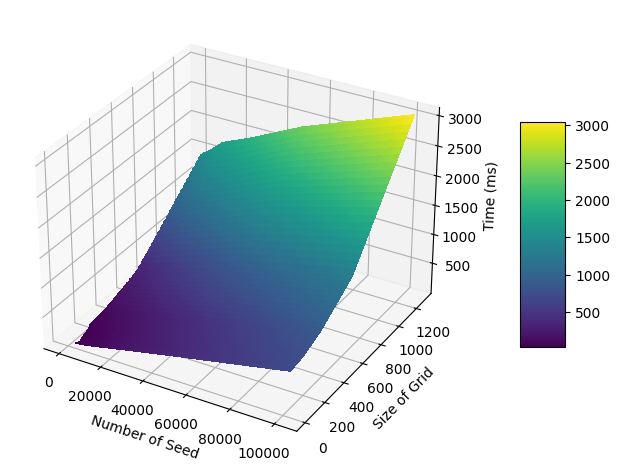

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(x_new, y_new, z_new, cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed')
ax.set_ylabel('Size of Grid')
ax.set_zlabel('Time (ms)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

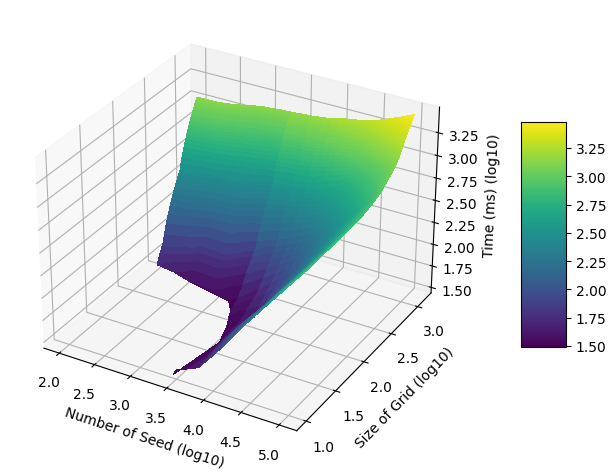

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(np.log10(x_new), np.log10(y_new), np.log10(z_new), cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed (log10)')
ax.set_ylabel('Size of Grid (log10)')
ax.set_zlabel('Time (ms) (log10)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
# dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)&(df['time'] * df['time'] < 10 * df['n'])]
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)&(df['m'] * df['m'] > df['n'])]
dataset

,n,m,time
5,100,320,49.3
6,100,640,237.8
7,100,1280,1120.7
13,200,320,55.6
14,200,640,255.1
15,200,1280,1130.4
21,400,320,66.3
22,400,640,273.9
23,400,1280,1223.8
29,800,320,64.8


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
logN = np.full(len(N), 0.0)
logM = np.full(len(N), 0.0)
logT = np.full(len(N), 0.0)
for i in range(len(logN)):
  logN[i] = math.log(N[i])
for i in range(len(logM)):
  logM[i] = math.log(M[i])
for i in range(len(logT)):
  logT[i] = math.log(T[i])

X = np.append(logN.reshape(-1, 1).T.T, logM.reshape(-1, 1).T.T, axis=1)
y = logT.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 -6.314054691268902
계수 [0.23262277 1.63260034]
결정계수 0.9474726538333316


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values

X = np.append((N**1.5).reshape(-1, 1).T.T, (M*M*np.log(M)).reshape(-1, 1).T.T, axis=1)
y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 79.68712927753748
계수 [1.97470271e-05 5.36867296e-04]
결정계수 0.9794782931087987
절편 0.0
계수 [2.25723517e-05 8.41708450e-04]
결정계수 0.9268832994815459


In [ ]:
# dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)&(df['m'] * df['m'] < df['n'])]
dataset

,n,m,time
40,3200,10,35.4
48,6400,10,44.5
49,6400,20,49.3
50,6400,40,50.7
56,12800,10,87.1
57,12800,20,100.7
58,12800,40,94.6
59,12800,80,96.1
64,25600,10,183.6
65,25600,20,183.6


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values

X = np.append((N).reshape(-1, 1).T.T, (M*M*np.log(M)).reshape(-1, 1).T.T, axis=1)
y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 6.254579728016097
계수 [0.00693188 0.00034826]
결정계수 0.999352757806442
절편 0.0
계수 [0.00701368 0.00035811]
결정계수 0.9991038250696241


## Sparse

- $10N < M^2$

$$O(N\sqrt N M)$$
```
절편 115.05958867801814
계수 [5.65911577e-06]
결정계수 0.9913044060197149
절편 0.0
계수 [5.75039558e-06]
결정계수 0.9903337655806363
```

n >> m^2 : 2m^2번 호출 => 2m^2 * n

n << m^2 :
m = 1280
n = 3200, m^2의 28% 45만, 10초 : 22.6 정사각형당 하나
n = 1600, m^2의 20% 33만, 4초 : 32 정사각형당 하나
n = 800, m^2의 15% 24만, 1.5초 :
n = 400, m^2의 10.5% 17만, 0.6초
n = 200, m^2의 7.33% 12만,
n = 100, m^2의 5% 8만

m / sqrt(n) * 비율 = 일정

시간은 m^2 * 비율 * n => m * n^1.5

- $N > M^2$

$$O(NM^2)$$
```
절편 183.7362535971506
계수 [1.33200786e-05]
결정계수 0.9885195205080264
절편 0.0
계수 [1.38187819e-05]
결정계수 0.9820292905125447
```

In [11]:
# 경로 변수 저장
csv_path = "plot_3dim_sparse.csv"

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
# pd.DataFrame(df.groupby(['n', 'm']).mean())
df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()
df

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       880 non-null    int64 
 1   m       880 non-null    int64 
 2   time    880 non-null    int64 
 3   name    880 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB
None
     n   m  time    name
0  100  10     0  Sparse
1  100  10    15  Sparse
2  100  10     0  Sparse
3  100  10     0  Sparse
4  100  10     0  Sparse
Index(['Sparse'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       880 non-null    int64  
 1   m       880 non-null    int64  
 2   time    880 non-null    float64
 3   name    880 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 27.6+ KB
None


<ipython-input-11-9b7948eb18e7>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()


,n,m,time
0,100,10,3.0
1,100,20,3.0
2,100,40,6.0
3,100,80,3.0
4,100,160,12.1
...,...,...,...
83,102400,80,8978.8
84,102400,160,15000.0
85,102400,320,15000.0
86,102400,640,15000.0


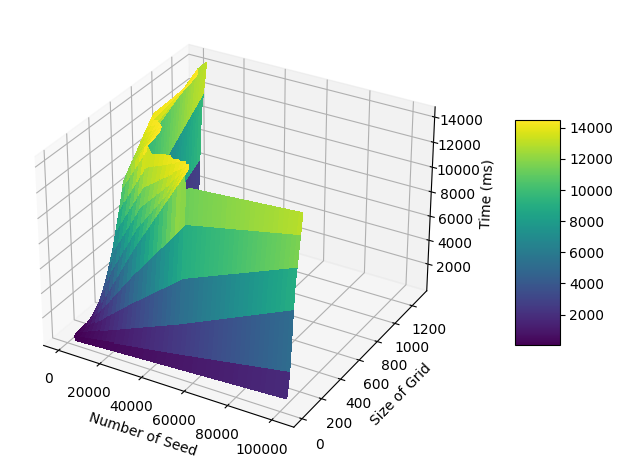

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(x_new, y_new, z_new, cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed')
ax.set_ylabel('Size of Grid')
ax.set_zlabel('Time (ms)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

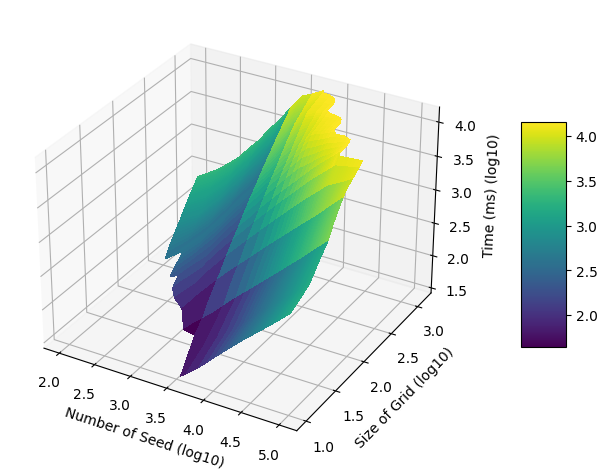

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(np.log10(x_new), np.log10(y_new), np.log10(z_new), cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed (log10)')
ax.set_ylabel('Size of Grid (log10)')
ax.set_zlabel('Time (ms) (log10)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

In [14]:
# dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)&(df['n'] * 10 < df['m'] * df['m'])]
dataset

,n,m,time
6,100,640,83.5
7,100,1280,225.3
13,200,320,56.9
14,200,640,128.6
15,200,1280,359.5
20,400,160,60.1
21,400,320,116.3
22,400,640,278.3
23,400,1280,673.3
28,800,160,121.2


In [37]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
logN = np.full(len(N), 0.0)
logM = np.full(len(N), 0.0)
logT = np.full(len(N), 0.0)
for i in range(len(logN)):
  logN[i] = math.log(N[i])
for i in range(len(logM)):
  logM[i] = math.log(M[i])
for i in range(len(logT)):
  logT[i] = math.log(T[i])

X = np.append(logN.reshape(-1, 1).T.T, (logM).reshape(-1, 1).T.T, axis=1)
y = logT.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 -9.723580549078672
계수 [1.21128828 1.28117068]
결정계수 0.9908384865525337


In [35]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values

X = np.append((M*0).reshape(-1, 1).T.T, (N**1.5 * M ).reshape(-1, 1).T.T, axis=1)

# X = np.full(len(N), 0)
# for i in range(len(X)):
#   X[i] = min(M[i] * N[i], N[i]**1.5 * math.log(M[i])) * M[i]
# X = X.reshape(-1, 1).T.T

y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 107.23417913920002
계수 [0.00000000e+00 3.69762893e-05]
결정계수 0.9716559311939508
절편 0.0
계수 [0.00000000e+00 3.75414198e-05]
결정계수 0.9708192034881802


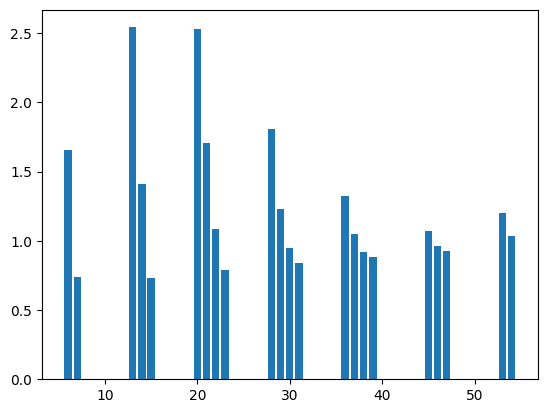

In [41]:
I = dataset.index
N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
T2 = 115.05958867801814 + 5.65911577e-06 * N**1.5 * M * np.log(M)

# plt.bar(I - 0.2, T, width = 0.3, label='real')
# plt.bar(I + 0.2, T2, width = 0.3, label='fake')
# plt.legend()

plt.bar(I, T2/T)

plt.show()

In [ ]:
# dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)&(df['n'] > df['m'] * df['m'])]
dataset

,n,m,time
41,3200,20,41.6
42,3200,40,82.5
48,6400,10,50.8
49,6400,20,79.3
50,6400,40,171.2
56,12800,10,105.6
57,12800,20,150.9
58,12800,40,336.4
59,12800,80,1075.9
64,25600,10,214.6


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values

X = np.append((M*0).reshape(-1, 1).T.T, (N * M**2).reshape(-1, 1).T.T, axis=1)

y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 183.7362535971506
계수 [0.00000000e+00 1.33200786e-05]
결정계수 0.9885195205080264
절편 0.0
계수 [0.00000000e+00 1.38187819e-05]
결정계수 0.9820292905125447


## Dense

$$O(M^4/N + M^2 \log M)$$
```
절편 318.72667178056315
계수 [1.87269197e-06 1.21321533e-04]
결정계수 0.9847580030943792

절편 0.0
계수 [1.86500405e-06 1.56860155e-04]
결정계수 0.9604958892611951
```

In [ ]:
# 경로 변수 저장
csv_path = "plot_3dim_dense.csv"

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
# pd.DataFrame(df.groupby(['n', 'm']).mean())
df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()
df

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       880 non-null    int64 
 1   m       880 non-null    int64 
 2   time    880 non-null    int64 
 3   name    880 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB
None
     n   m  time   name
0  100  10   156  Dense
1  100  10   171  Dense
2  100  10   171  Dense
3  100  10   155  Dense
4  100  10   202  Dense
Index(['Dense'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       880 non-null    int64  
 1   m       880 non-null    int64  
 2   time    880 non-null    float64
 3   name    880 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 27.6+ KB
None


<ipython-input-44-1b303822ecb8>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()


,n,m,time
0,100,10,175.7
1,100,20,177.1
2,100,40,183.5
3,100,80,172.6
4,100,160,195.6
...,...,...,...
83,102400,80,914.8
84,102400,160,936.7
85,102400,320,1020.9
86,102400,640,1298.7


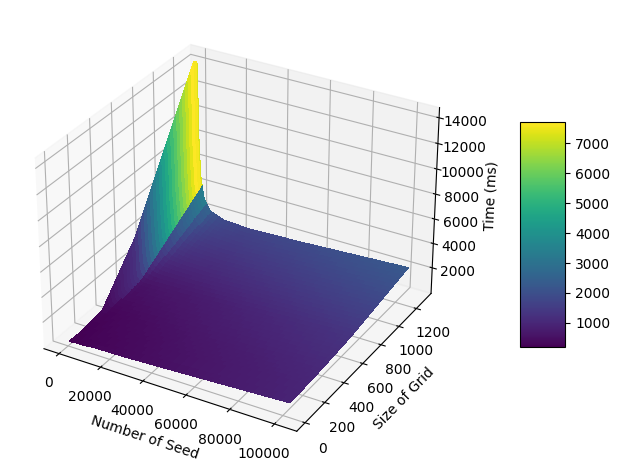

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(x_new, y_new, z_new, cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed')
ax.set_ylabel('Size of Grid')
ax.set_zlabel('Time (ms)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

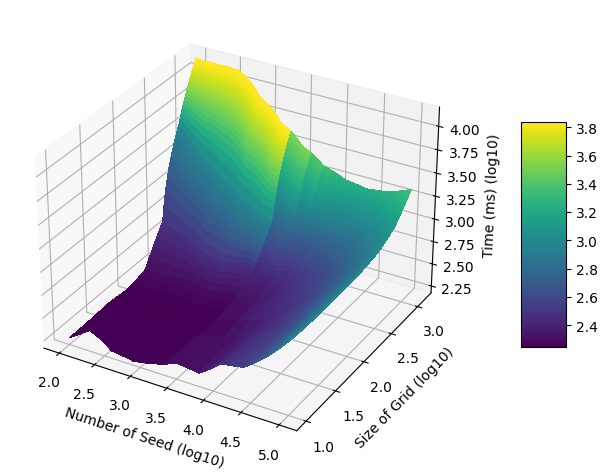

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(np.log10(x_new), np.log10(y_new), np.log10(z_new), cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed (log10)')
ax.set_ylabel('Size of Grid (log10)')
ax.set_zlabel('Time (ms) (log10)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]
dataset

,n,m,time
0,100,10,175.7
1,100,20,177.1
2,100,40,183.5
3,100,80,172.6
4,100,160,195.6
...,...,...,...
83,102400,80,914.8
84,102400,160,936.7
85,102400,320,1020.9
86,102400,640,1298.7


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
logN = np.full(len(N), 0.0)
logM = np.full(len(N), 0.0)
logT = np.full(len(N), 0.0)
for i in range(len(logN)):
  logN[i] = math.log(N[i])
for i in range(len(logM)):
  logM[i] = math.log(M[i])
for i in range(len(logT)):
  logT[i] = math.log(T[i])

X = np.append(logN.reshape(-1, 1).T.T, logM.reshape(-1, 1).T.T, axis=1)
y = logT.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 3.2250364665329663
계수 [0.11445827 0.4107288 ]
결정계수 0.5039355134152821


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
M4N = np.full(len(N), 0.0)
M2logM = np.full(len(N), 0.0)
for i in range(len(M4N)):
  M4N[i] = M[i]**4 / N[i]
for i in range(len(M2logM)):
  M2logM[i] = M[i] * M[i] * math.log(M[i])

X = np.append(M4N.reshape(-1, 1).T.T, M2logM.reshape(-1, 1).T.T, axis=1)
y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 318.72667178056315
계수 [1.87269197e-06 1.21321533e-04]
결정계수 0.9847580030943792
절편 0.0
계수 [1.86500405e-06 1.56860155e-04]
결정계수 0.9604958892611951


## Quad

$$O(N + M^2 \log^2 M)$$
```
절편 108.4928799559192
계수 [8.34322262e-03 1.33134753e-05]
결정계수 0.9702950665022273

절편 0.0
계수 [9.70211211e-03 1.45061110e-05]
결정계수 0.9340861052083563
```

In [ ]:
# 경로 변수 저장
csv_path = "plot_3dim_quad.csv"

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
# pd.DataFrame(df.groupby(['n', 'm']).mean())
df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()
df

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       880 non-null    int64 
 1   m       880 non-null    int64 
 2   time    880 non-null    int64 
 3   name    880 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB
None
     n   m  time  name
0  100  10   124  Quad
1  100  10   108  Quad
2  100  10   108  Quad
3  100  10    92  Quad
4  100  10   124  Quad
Index(['Quad'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       880 non-null    int64  
 1   m       880 non-null    int64  
 2   time    880 non-null    float64
 3   name    880 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 27.6+ KB
None


<ipython-input-50-1eb3813fe9f6>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()


,n,m,time
0,100,10,109.7
1,100,20,111.7
2,100,40,108.3
3,100,80,116.0
4,100,160,125.5
...,...,...,...
83,102400,80,860.6
84,102400,160,917.8
85,102400,320,969.6
86,102400,640,1298.4


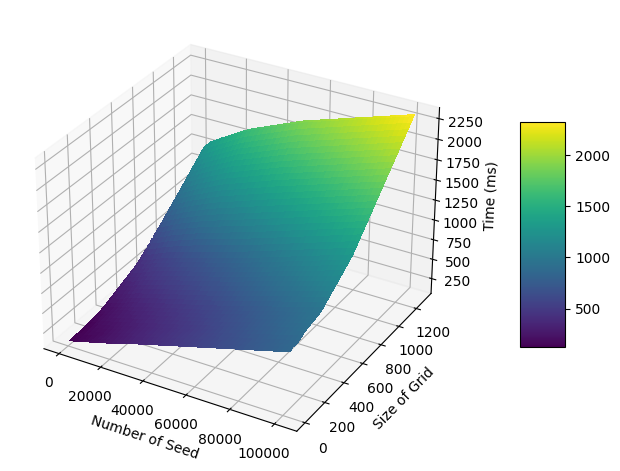

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(x_new, y_new, z_new, cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed')
ax.set_ylabel('Size of Grid')
ax.set_zlabel('Time (ms)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

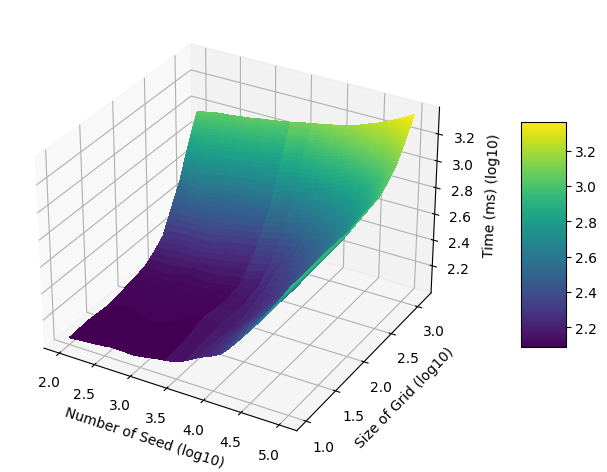

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(np.log10(x_new), np.log10(y_new), np.log10(z_new), cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed (log10)')
ax.set_ylabel('Size of Grid (log10)')
ax.set_zlabel('Time (ms) (log10)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]
dataset

,n,m,time
0,100,10,109.7
1,100,20,111.7
2,100,40,108.3
3,100,80,116.0
4,100,160,125.5
...,...,...,...
83,102400,80,860.6
84,102400,160,917.8
85,102400,320,969.6
86,102400,640,1298.4


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
logN = np.full(len(N), 0.0)
logM = np.full(len(N), 0.0)
logT = np.full(len(N), 0.0)
for i in range(len(logN)):
  logN[i] = math.log(N[i])
for i in range(len(logM)):
  logM[i] = math.log(M[i])
for i in range(len(logT)):
  logT[i] = math.log(T[i])

X = np.append(logN.reshape(-1, 1).T.T, logM.reshape(-1, 1).T.T, axis=1)
y = logT.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 2.2018342580433767
계수 [0.23181876 0.33778374]
결정계수 0.7195854517223413


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
M2log2M = np.full(len(N), 0.0)
for i in range(len(M2log2M)):
  M2log2M[i] = M[i] * M[i] * math.log(M[i]) * math.log(M[i])

X = np.append(N.reshape(-1, 1).T.T, M2log2M.reshape(-1, 1).T.T, axis=1)
y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 108.4928799559192
계수 [8.34322262e-03 1.33134753e-05]
결정계수 0.9702950665022273
절편 0.0
계수 [9.70211211e-03 1.45061110e-05]
결정계수 0.9340861052083563


## BFS

$$O(NM + N \log N + M^2)$$
```
절편 20.824610639005186
계수 [3.90658293e-07 1.31114822e-03 1.96073509e-04]
결정계수 0.9986708074172801

절편 0.0
계수 [1.32471408e-07 1.33896086e-03 2.11419330e-04]
결정계수 0.9978994208612438
```

In [2]:
# 경로 변수 저장
csv_path = "plot_3dim_bfs.csv"

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
# pd.DataFrame(df.groupby(['n', 'm']).mean())
df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()
df

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       880 non-null    int64 
 1   m       880 non-null    int64 
 2   time    880 non-null    int64 
 3   name    880 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB
None
     n   m  time name
0  100  10     0  BFS
1  100  10     0  BFS
2  100  10     0  BFS
3  100  10     0  BFS
4  100  10     0  BFS
Index(['BFS'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       880 non-null    int64  
 1   m       880 non-null    int64  
 2   time    880 non-null    float64
 3   name    880 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 27.6+ KB
None


<ipython-input-2-3e3b01ae6067>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()


,n,m,time
0,100,10,1.5
1,100,20,0.0
2,100,40,3.0
3,100,80,1.5
4,100,160,9.0
...,...,...,...
83,102400,80,1545.2
84,102400,160,1551.6
85,102400,320,1592.0
86,102400,640,1674.7


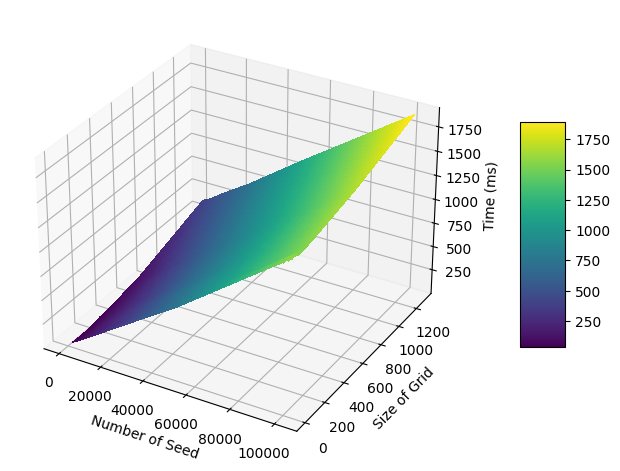

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(x_new, y_new, z_new, cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed')
ax.set_ylabel('Size of Grid')
ax.set_zlabel('Time (ms)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

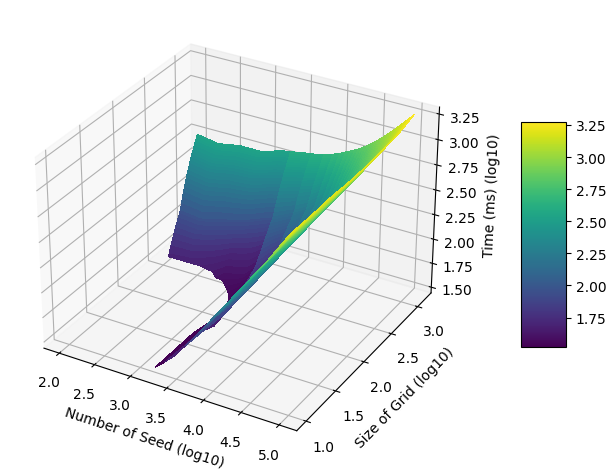

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(np.log10(x_new), np.log10(y_new), np.log10(z_new), cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed (log10)')
ax.set_ylabel('Size of Grid (log10)')
ax.set_zlabel('Time (ms) (log10)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

In [5]:
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]

In [6]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
logN = np.full(len(N), 0.0)
logM = np.full(len(N), 0.0)
logT = np.full(len(N), 0.0)
for i in range(len(logN)):
  logN[i] = math.log(N[i])
for i in range(len(logM)):
  logM[i] = math.log(M[i])
for i in range(len(logT)):
  logT[i] = math.log(T[i])

X = np.append(logN.reshape(-1, 1).T.T, logM.reshape(-1, 1).T.T, axis=1)
y = logT.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 -1.1728408107722421
계수 [0.56606788 0.31198128]
결정계수 0.6866796661163832


In [7]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
NlogN = np.full(len(N), 0.0)
M2 = np.full(len(N), 0.0)
for i in range(len(NlogN)):
  NlogN[i] = N[i] * math.log(N[i])
for i in range(len(M2)):
  M2[i] = M[i] * M[i]

X = np.append((N*M).reshape(-1, 1).T.T, np.append(NlogN.reshape(-1, 1).T.T, M2.reshape(-1, 1).T.T, axis=1), axis=1)
y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 20.824610639005186
계수 [3.90658293e-07 1.31114822e-03 1.96073509e-04]
결정계수 0.9986708074172801
절편 0.0
계수 [1.32471408e-07 1.33896086e-03 2.11419330e-04]
결정계수 0.9978994208612438


## Sweeping

$$O(NM + N \log N + M^2)$$
```
절편 26.630458591373895
계수 [5.91239468e-07 1.29381174e-03 1.57798915e-04]
결정계수 0.9984588563257042

절편 0.0
계수 [2.61107005e-07 1.32927066e-03 1.77496400e-04]
결정계수 0.997258431955142
```

In [8]:
# 경로 변수 저장
csv_path = "plot_3dim_sweeping.csv"

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
# pd.DataFrame(df.groupby(['n', 'm']).mean())
df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()
df

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       880 non-null    int64 
 1   m       880 non-null    int64 
 2   time    880 non-null    int64 
 3   name    880 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB
None
     n   m  time      name
0  100  10    15  Sweeping
1  100  10     0  Sweeping
2  100  10    31  Sweeping
3  100  10    15  Sweeping
4  100  10     0  Sweeping
Index(['Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       880 non-null    int64  
 1   m       880 non-null    int64  
 2   time    880 non-null    float64
 3   name    880 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 27.6+ KB
None


<ipython-input-8-69a9ed5095e8>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(df.groupby(['n', 'm']).mean()).reset_index()


,n,m,time
0,100,10,7.6
1,100,20,10.5
2,100,40,3.0
3,100,80,1.5
4,100,160,9.0
...,...,...,...
83,102400,80,1517.3
84,102400,160,1582.7
85,102400,320,1609.2
86,102400,640,1643.4


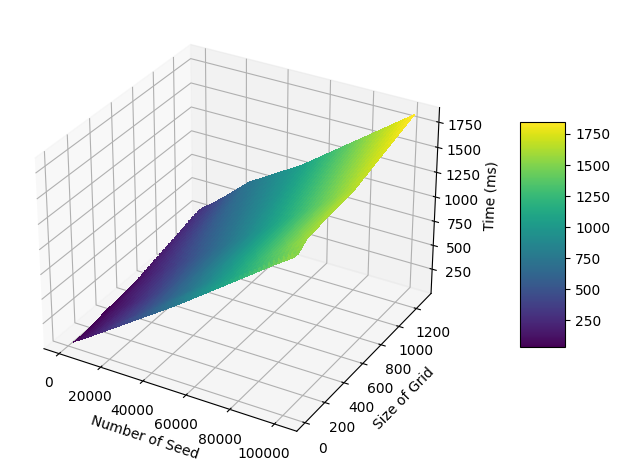

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(x_new, y_new, z_new, cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed')
ax.set_ylabel('Size of Grid')
ax.set_zlabel('Time (ms)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

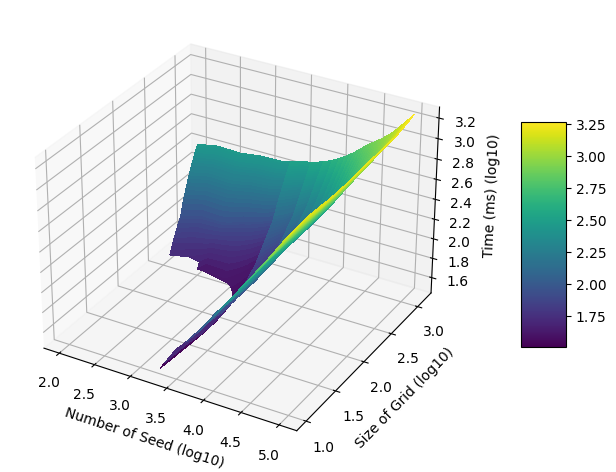

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Generating data
x = df['m'].drop_duplicates()
y = df['n'].drop_duplicates()
x, y = np.meshgrid(x, y)
z = np.full(x.shape, 0.0)
for i in range(11):
  for j in range(8):
    z[i][j] = df[(df['m'] == x[i][j])&(df['n'] == y[i][j])]['time'].values

interp_func = RegularGridInterpolator((y[:, 0], x[0, :]), z)
x_new = np.linspace(100, 102400, 1024)
y_new = np.linspace(10, 1280, 128)
x_new, y_new = np.meshgrid(x_new, y_new)
points = np.array([x_new.ravel(), y_new.ravel()]).T
z_new = interp_func(points).reshape(x_new.shape)

for i in range(len(z_new)):
  for j in range(len(z_new[0])):
    if (z_new[i][j] <= time_lower or z_new[i][j] >= time_upper): z_new[i][j] = np.nan

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the surface
surf = ax.plot_surface(np.log10(x_new), np.log10(y_new), np.log10(z_new), cmap='viridis', antialiased=False)
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)

# Adding labels
ax.set_xlabel('Number of Seed (log10)')
ax.set_ylabel('Size of Grid (log10)')
ax.set_zlabel('Time (ms) (log10)')

# fitting
plt.tight_layout()

# Displaying the plot
plt.show()

In [11]:
dataset = df[(df['time']>time_lower)&(df['time']<time_upper)]

In [12]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
logN = np.full(len(N), 0.0)
logM = np.full(len(N), 0.0)
logT = np.full(len(N), 0.0)
for i in range(len(logN)):
  logN[i] = math.log(N[i])
for i in range(len(logM)):
  logM[i] = math.log(M[i])
for i in range(len(logT)):
  logT[i] = math.log(T[i])

X = np.append(logN.reshape(-1, 1).T.T, logM.reshape(-1, 1).T.T, axis=1)
y = logT.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 -0.680200136450213
계수 [0.54719037 0.25157575]
결정계수 0.6925045321860612


In [13]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

N = dataset['n'].values
M = dataset['m'].values
T = dataset['time'].values
NlogN = np.full(len(N), 0.0)
M2 = np.full(len(N), 0.0)
for i in range(len(NlogN)):
  NlogN[i] = N[i] * math.log(N[i])
for i in range(len(M2)):
  M2[i] = M[i] * M[i]

X = np.append((N*M).reshape(-1, 1).T.T, np.append(NlogN.reshape(-1, 1).T.T, M2.reshape(-1, 1).T.T, axis=1), axis=1)
y = T.T

reg = LinearRegression()
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

reg = LinearRegression(fit_intercept = False)
reg.fit(X, y)
print("절편", reg.intercept_)
print("계수", reg.coef_)
print("결정계수", reg.score(X, y))

절편 26.630458591373895
계수 [5.91239468e-07 1.29381174e-03 1.57798915e-04]
결정계수 0.9984588563257042
절편 0.0
계수 [2.61107005e-07 1.32927066e-03 1.77496400e-04]
결정계수 0.997258431955142
